**Problem Statement**

Use random forst to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :
Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual 

owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
fraud=pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


**Feature Engineering**

In [6]:
fraud1=fraud.copy()

list=[]
for i in range(0,len(fraud)):
  if fraud['Taxable.Income'][i]<=30000:
    list.append('Risky')
  elif fraud['Taxable.Income'][i]>30000:
    list.append('Good')

fraud1['type']=list
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
fraud1.type.value_counts()

Good     476
Risky    124
Name: type, dtype: int64

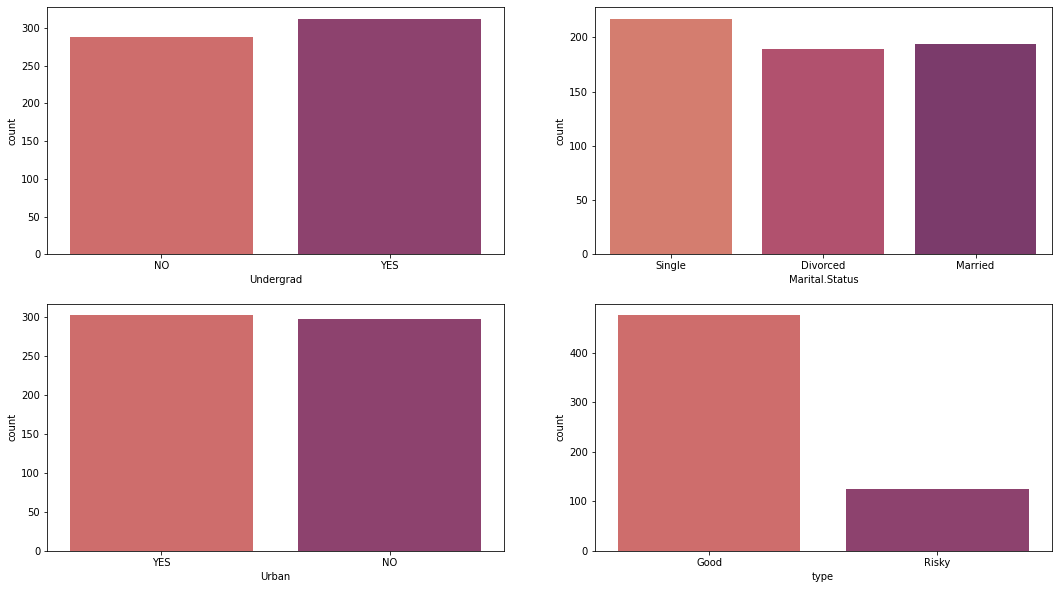

In [8]:
#Visualisation for categorical features
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(fraud1['Undergrad'],palette='flare')
plt.subplot(2,2,2)
sns.countplot(fraud1['Marital.Status'],palette='flare')

plt.subplot(2,2,3)
sns.countplot(fraud1['Urban'],palette='flare')
plt.subplot(2,2,4)
sns.countplot(fraud1['type'],palette='flare')

plt.show()

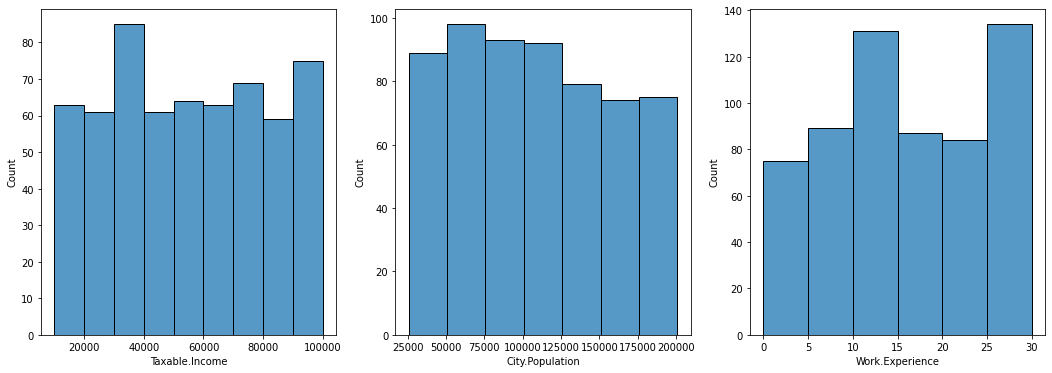

In [9]:
#Visualisation for continuous features
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.histplot(fraud1['Taxable.Income'],bins=range(min(fraud1['Taxable.Income']),max(fraud1['Taxable.Income'])+10000,10000))

plt.subplot(1,3,2)
sns.histplot(fraud1['City.Population'],bins=range(min(fraud1['City.Population']),max(fraud1['City.Population'])+25000,25000))

plt.subplot(1,3,3)
sns.histplot(fraud1['Work.Experience'],bins=range(min(fraud1['Work.Experience']),max(fraud1['Work.Experience'])+5,5))

plt.show()

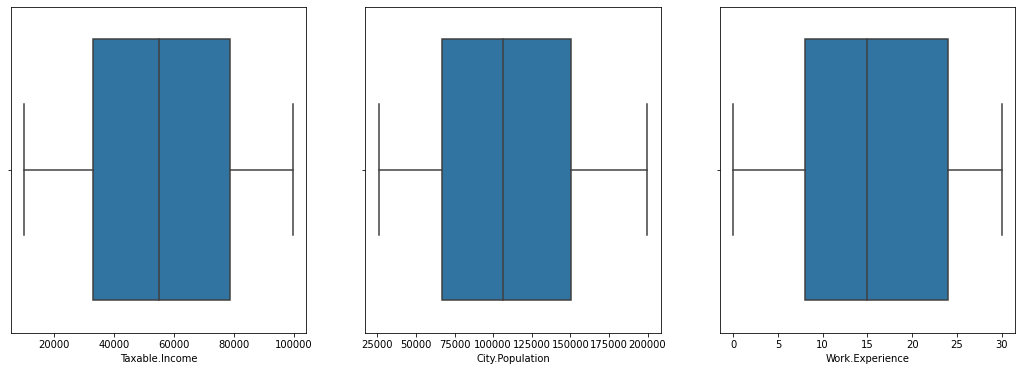

In [10]:
#Box-plot for outlier detection
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(fraud1['Taxable.Income'])

plt.subplot(1,3,2)
sns.boxplot(fraud1['City.Population'])

plt.subplot(1,3,3)
sns.boxplot(fraud1['Work.Experience'] ) 

plt.show()

**Univariate Analysis**

In [11]:
type_risky=pd.DataFrame()
type_good=pd.DataFrame()

type_risky=fraud1.loc[fraud1['type']=='Risky']

type_good=fraud1.loc[fraud1['type']=='Good']

Taxable.Income with respect to Fraud

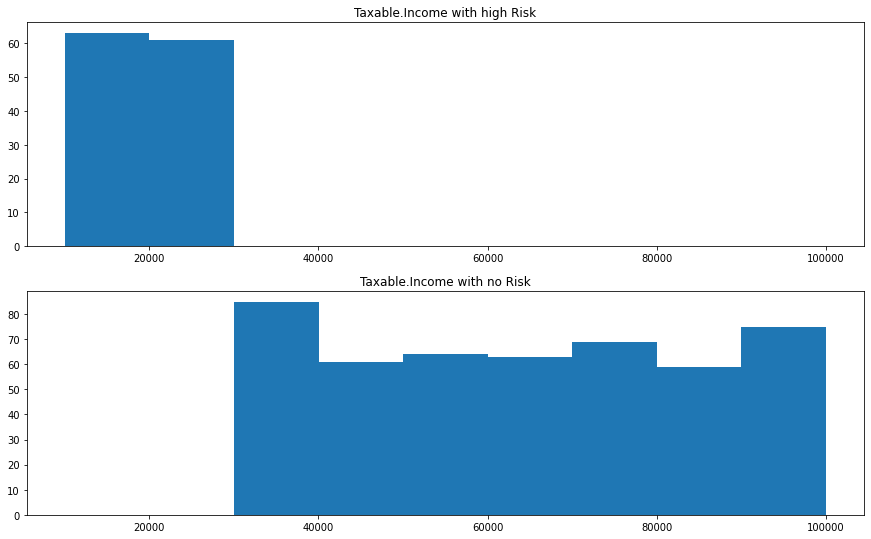

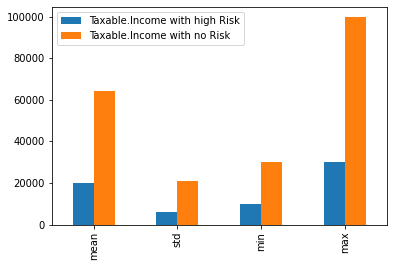

In [12]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(type_risky['Taxable.Income'],bins=range(min(fraud1['Taxable.Income']),max(fraud1['Taxable.Income'])+10000,10000))
plt.title('Taxable.Income with high Risk')

plt.subplot(3,1,2)
plt.hist(type_good['Taxable.Income'],bins=range(min(fraud1['Taxable.Income']),max(fraud1['Taxable.Income'])+10000,10000))
plt.title('Taxable.Income with no Risk',)

income_describe=pd.DataFrame()

income_describe['Taxable.Income with high Risk']=type_risky['Taxable.Income'].describe()
income_describe['Taxable.Income with no Risk']=type_good['Taxable.Income'].describe()
income_describe=income_describe.drop(['count','25%','50%','75%'])

plt.subplot(3,1,2)
income_describe.plot.bar()

plt.show()

Work.Experience with respect to Fraud

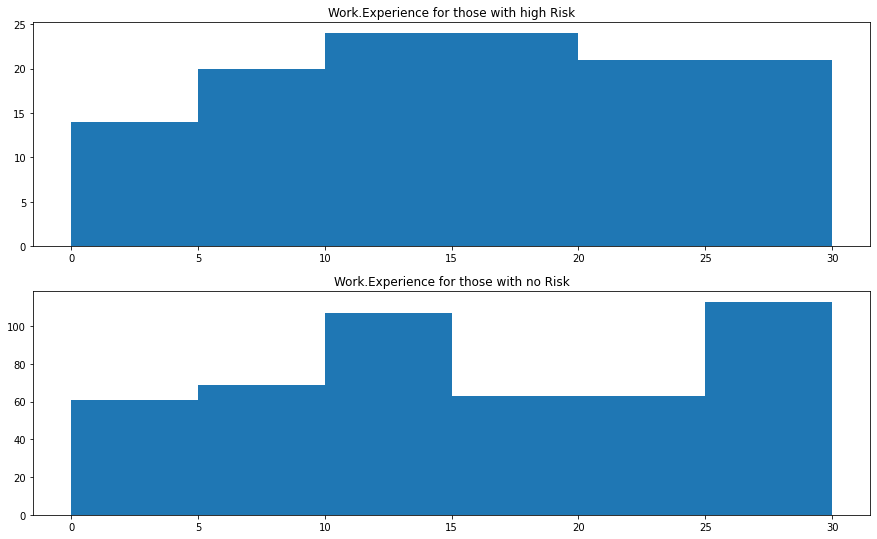

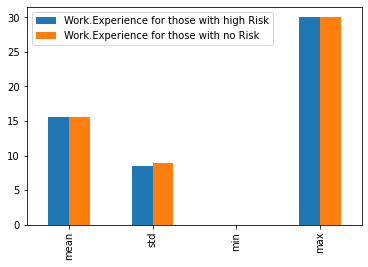

In [13]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(type_risky['Work.Experience'],bins=range(min(fraud1['Work.Experience']),max(fraud1['Work.Experience'])+5,5))
plt.title('Work.Experience for those with high Risk')

plt.subplot(3,1,2)
plt.hist(type_good['Work.Experience'],bins=range(min(fraud1['Work.Experience']),max(fraud1['Work.Experience'])+5,5))
plt.title('Work.Experience for those with no Risk',)

exp_describe=pd.DataFrame()

exp_describe['Work.Experience for those with high Risk']=type_risky['Work.Experience'].describe()
exp_describe['Work.Experience for those with no Risk']=type_good['Work.Experience'].describe()
exp_describe = exp_describe.drop(['count','25%','50%','75%'])

plt.subplot(3,1,2)
exp_describe.plot.bar()

plt.show()

Undergrad Education with respect to Fraud

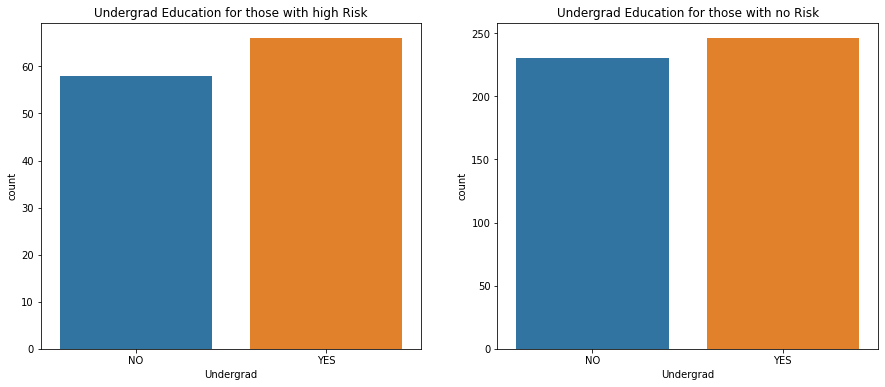

In [14]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(type_risky['Undergrad'])
plt.title('Undergrad Education for those with high Risk')

plt.subplot(1,2,2)
sns.countplot(type_good['Undergrad'])
plt.title('Undergrad Education for those with no Risk',)

plt.show()

Marital Status with respect to Fraud

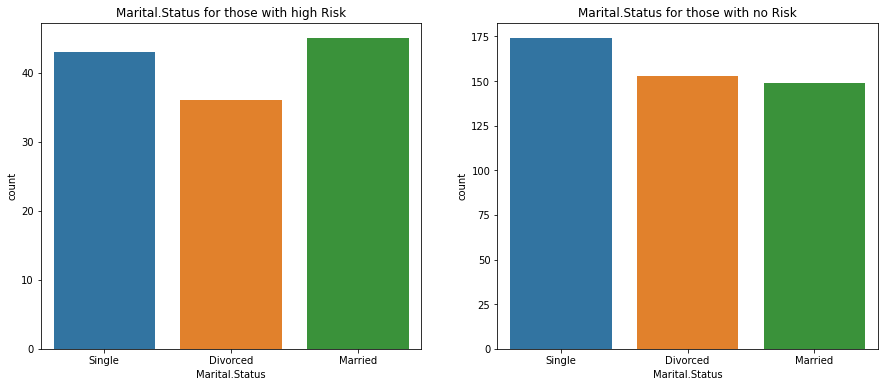

In [15]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(type_risky['Marital.Status'])
plt.title('Marital.Status for those with high Risk')

plt.subplot(1,2,2)
sns.countplot(type_good['Marital.Status'])
plt.title('Marital.Status for those with no Risk',)

plt.show()

Residence with respect to Fraud

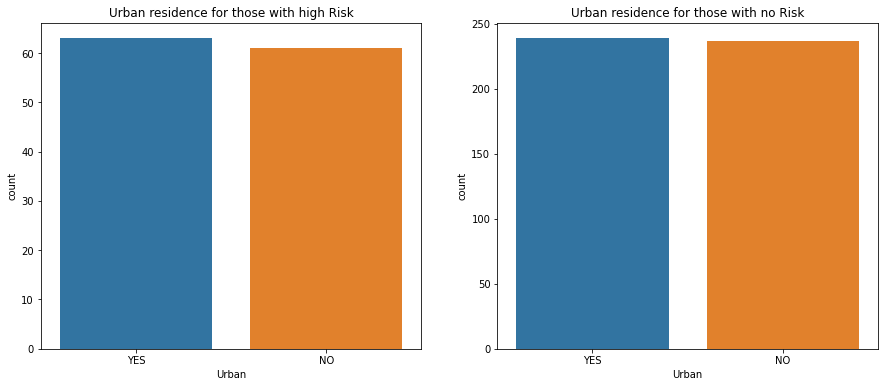

In [16]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(type_risky['Urban'])
plt.title('Urban residence for those with high Risk')

plt.subplot(1,2,2)
sns.countplot(type_good['Urban'])
plt.title('Urban residence for those with no Risk',)

plt.show()

**Preprocessing of the data**

In [17]:
fraud2=fraud1.copy()
fraud2=fraud2.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience","Urban":"urban"})
fraud2.drop("taxable_income",axis=1,inplace=True)
fraud2

,undergrad,marital_status,city_population,work_experience,urban,type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [18]:
x=fraud2.drop("type",axis=1)
y=fraud2["type"]

In [19]:
#Encoding of input categorical features
x=pd.get_dummies(x)

In [20]:
#Encoding output categorical features
le=LabelEncoder()
y=le.fit_transform(y)

Splitting data into training set & test set.

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [22]:
print("Shape of X_train:",x_train.shape)
print("Shape of X_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (480, 9)
Shape of X_test: (120, 9)
Shape of y_train: (480,)
Shape of y_test: (120,)


**Building Random Forest Classifier**

In [23]:
num_trees = 100
max_features = 3

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)

print('Batchwise accuracy is:', '\n', results,'\n')
print('Overall accuracy is:', results.mean())

Batchwise accuracy is: 
 [0.76666667 0.68333333 0.8        0.8        0.7        0.66666667
 0.71666667 0.61666667 0.75       0.75      ] 

Overall accuracy is: 0.725


**Grid search for hyper parameter tuning**

In [24]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = { 
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]   
}

rf = RandomForestClassifier(random_state=7)

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.7933333333333332
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 10}


**Building final model based on grid.best_params_**

In [26]:
model_kf=grid.best_estimator_
model_kf.fit(x,y)

results=cross_val_score(model_kf,x,y,cv=kfold)
print('Accuracy with k fold validation',np.round(results.mean(),3))

Accuracy with k fold validation 0.793


In [27]:
model=grid.best_estimator_ 
model.fit(x_train, y_train)

pred=model.predict(x_test)
print('Accuracy with train test split:',accuracy_score(y_test,pred))

Accuracy with train test split: 0.7666666666666667


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



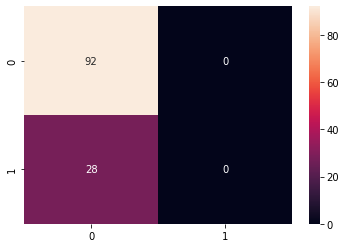

In [29]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)